# Programando Algoritmos Cuańticos IV: Temple cuántico (o Quantum Annealing)
---
Autores: Alejandro Pozas-Kerstjens y Gorka Muñoz-Gil

## Introducción
En el primer bloque nos hemos centrado en la computación computación cuántica basada en puertas lógica y qubits. Pero esta no es la única manera de sacar ventajas de las propiedades de la cuántica en cuanto a programación se refiere. Existen varios modelos, como por ejemplo los [ordenadores cuánticos de sentido único](https://en.wikipedia.org/wiki/One-way_quantum_computer), los [ordenadores cuánticos topológicos](https://en.wikipedia.org/wiki/Topological_quantum_computer) y los que veremos en detalle en esta sesión: la [computación cuántica adiabática](https://en.wikipedia.org/wiki/Adiabatic_quantum_computation). Este método se basa en el concepto de temple cuántico (o *quantum annealing*) y es capazar de solucionar problemas de optimización codificandolos en la energía de un sistema física para luego buscar cual de sus configuraciones tiene menor energía. En este notebook, vamos a estudiar como funciona el quantum annealing y lo vamos a usar para resolver una versión reducida del *problema del viajante*.



## El algoritmo
El quantum annealing funciona mediante dos fenómenos de la física cuántica: el *tunneling* y la evolución adiabática. El primero nos permite atravesar, de manera probabilistica, barreras de energía, a través de la cuales vamos a poder encontrar la posición de mínima energía. Por su parte, la evoluación adiabática nos permite pasar de una solución optima de un problema sencillo a la de problema más complejo. La siguiente figura ilustra los dos conceptos:

<img src="anneal_tunnel.png" style="width:70%;height:350px;"/>

Aunque las dos son importantes en los algoritmos de temple cuántica, nos vamos a centrar en la segunda, ya que puede implementarse de manera directa en el hardware del ordenadore cuántico de D-wave. El quantum annealing está inspirado en el [teorema adiabático](https://es.wikipedia.org/wiki/Teorema_adiab%C3%A1tico), que citando a sus autores, Max Born y Vladimir Fock, nos dice lo siguiente: *Un sistema físico permanece en su estado propio instantáneo si la perturbación que actúa sobre él es lo bastante lenta y hay un salto energético entre su valor propio y el resto del espectro del Hamiltoniano*.

Este concepto puede ser usado de manera directa en problemas de optimización, ya que el estado fundamental (el estado de mínima energía) siempre será el estado fundamental de Hamiltoniano del sistema mientras la evolución mediante la cual cambiemos dicho Hamiltoniano sea adiabática. Utilizando este concepto, podemos encontrar la solución óptima a un cierto problema utilizando el siguiente procedimiento:

1. Codificar el problema como un Hamiltoniano $H_c$, normalmente muy complejo, de un sistema de $N$ qubits. 
2. Inicializar dichos qubits como el estado fundamental de un Hamiltonian $H_0$, normalmente sencillo.
3. Utilizar la evolución adiabática para llevar el sistema de $H_0$ a $H_c$.

Si podemos cambiar de manera suficientement lenta el Hamiltoniano, entonces sabes que el estado final del sistema de qubits es el estado fundamental del Hamiltoniano $H_c$, el cual codifica la solución óptima del problema que queremos solucionar.

Definidas las premisas anteriores, una podría pensar que llevar a cabo dicho proceso solo consiste en una serie de cálculos matemáticos. Una vez el Hamiltonian y la configuración inicial del sistema han sido definidos, solo tenemos que escribir el estado del sistema como un ket, calcular la matriz de evolución del Hamiltonian y hacer el producto entre la matríz y el vector obtenidos. Sin embargo, hay que recordar que el estado de un sistema de $n$ qubits necesita, para ser descrito, un vector de $2^n$ entradas. Por su parte, la operador de evolución es una matriz de $2^n\times 2^n$, por lo que una vez consideremos sistemas de tamaños medios, el cálculo matricial es imposible.

La solución al problema no es entonces crear un circuito para calcular la evoluación de un cierto estado cuántico, si no crear un sistema físico y hacerlo evolucionar de manera física según los Hamiltonianos de interés. Esto es exactmente como funciona el máquina cuántica de D-Wave. Al contrario que la computación cuántica digital, basada en puertas lógicas, esta máquina es un modelo analógico. Para encontrar la solución óptima a un cierto problema, inicializan su chip cuántico en una superposición de estados $|+\rangle^{\otimes n}=\frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1}|x\rangle$, el estado fundamental del Hamiltoniano $H_0=\sum_{i=1}^n X_i$ y que representa la superposición de todas las posibles configuraciones clásicas de qubits, y transicionan de la *manera más adiabática posible* al Hamiltonian $H_c$. 

Una vez hechos estos pasos, miden el estado de los qubits resultante para obtener el estado de mínima energía del $H_c$, el cual corresponde con la soluación de nuestro problema. Este procediciento permite a D-Wave resolver problemas de optimización usando hasta 2018 qubits, lo cual requiriría, en caso de quere hacer una simulación clásica, de trabajar con matrices con $3\times 10^{616}$. 

Ahora que conocemos los fundamentos del temple cuántico, vamos a utilizarlos para resolver el problema del viajante!

## El problema del viajante

Imaginar un mensajero que cada día reparte correo en una serie de ciudades, todas de una misma area. Por razones medioambientales (minimizar el consumo de gasolina) y para disfrute personal (acabar antes el trabajo para poder ir a casa), el mensajero quiere encontrar la ruta más corta posible para repartir el correro, pasando al por cada ciudad solo una vez y volviendo al punto inicial (donde está la oficina de mensajería). Si tuvieramos una número pequeño de ciudades que visitar, podríamos calcular todas las rutas posibles y ver cual es la más corta. Sin embargo, si el número de ciudades crece, calcular todos los posibles caminos no es práctico. Solo con 15 ciudades, necesitaríamos calcular $15!=15\times 14\times\dots\times 1= 1.307.674.368.000$ caminos. Por lo tanto, necesitamos encontrar una manera un poco más inteligente de resolver este problema, y como no podría ser de otra manera, vamos a utilizar la física cuántica y el temple cuántico para ello.

Para poder utilizar el temple cuántico, debemos encontrar un Hamiltonian $H_c$ que codifique la distancia entre ciudades y cuyos autovectores represente las diferentes rutas, de manera que el estado fundamentel represente la ruta con el menor recorrido.

Una opción es utilizar *un qubit por ciudad y orden en la ruta* De esta manera, si queremos visitar $N$ ciudades, necesitaremos $N^2$ qubits. El primer qubit representa la primera ciudad que vamos a visitar, el segundo qubit la primera ciudad siendo visitada segunda, ..., el $N+1$ qubit la segunda ciudad siendo visitada primera, etc... Con esta construcción, elegiremos que la fuerza de la interacción entre dos qubits es proporcional a la distancia entre las ciudades, de tal manera que minimizar la energía del sistema de qubits equivale a encontrar la ruta con la menor distancia. Si un qubit $x_{c, t}$ tiene un valor 1 al ser medido, quiere decir que la ciudad $c$ ha de ser visitada en el orden $t$, mientras que si tiene un valor 0, no debe ser visitada en dicho orden. Como queremos visitar las ciudades una despues de otra, crearemos interacciones entre qubits que representen dos ciudades diferentes a tiempos $t$ y $t+1$. Esto creará una matriz de interacciones de la forma:

$$
\begin{array}{}
Q^{dist}_{(c_1,t),(c_2,t+1)}&=dist(c_1,c_2)    \\
Q^{dist}_{(c,t),(c,t')}&=0    \\
Q^{dist}_{(c_1,t),(c_2,t'\neq t+1)}&=0
\end{array}
$$

Aunque parezca que con esto tengamos suficiente, aun nos queda un requisito por cumplir. Y es que existe una configuración trivial que soluciona dicha matrix de interacciones: no visitar ninguna ciudad! Esta solución cumple dos de los requisitos: utilizar el mínimo de gasolina y acabar los más pronto posible, pero no cumple la condición de visitar cada una de las ciudades una vez. Podemos solucionar este pequeño inconveniente añadiendo una serie de términos al Hamiltoniano de manera que se minimicen si tenemos una ruta válida. Existen dos criterios para una ruta válida:

- Por cada tiempo $t$, existe solo una ciudad visitada
- Cada ciudad $c$ ha de visitarse solo una vez


Para imponer dichas condiciones, vamos a añadir a nuestra función de coste (en este caso a nuestro Hamiltoniano) el término $\lambda_1\sum_t(1-\sum_c x_{c,t})^2$, donde $\lambda$ es la magnitud de la penalización por no cumplir los requisitos (cuanto más grande $\lambda_1$, mas penalizamos). Este término se minimiza a 0 cuando, para cada tiempo $t$, $\sum_c x_{c,t}=1$, que significa que solo una ciudad ha sido visitada. Expandiendo y utilizando la propiedad $x_{c,t}^2=x_{c,t}$, encontramos la siguiente matriz de penalización:

$$
\begin{array}{}
Q^{pen_1}_{(c,t),(c,t)}&=-\lambda_1    \\
Q^{pen_1}_{(c,t_1),(c,t_2)}&=\lambda_1    \\
Q^{pen_1}_{rest}&=0    
\end{array}
$$

Para implementar el segundo requisito, vamos a añadir el término $\lambda_2\sum_c(1-\sum_t x_{c,t})^2$, el cual minimizamos a cero cuando, para cada ciudad $c$, solo existe una visita planeado en la ruta. La matríz de penalización en este case es

$$
\begin{array}{}
Q^{pen_2}_{(c,t),(c,t)}&=-\lambda_2    \\
Q^{pen_2}_{(c_1,t),(c_2,t)}&=\lambda_2    \\
Q^{pen_2}_{rest}&=0    
\end{array}
$$

Juntando todas las matrices, la de las interacciones y las dos de la restricciones, tenemos el Hamiltoniano final a minimizar,  $Q=Q^{dist}+Q^{pen_1}+Q^{pen_2}$. La ruta $\mathbf{x}$ que minimice $\mathbf{x}^T Q \mathbf{x}$ será entonces la ruta óptima!

## Resolviendo el problema con D-Wave's [Ocean](https://ocean.dwavesys.com/)
Ahora que sabemos como transformar nuestro problema a un problema de temple cuántico, vamos a usar un ordenador cuántico real para encontrar la ruta óptima $\mathbf{x}$. Para ello, vamos a utilizar el software Ocean de D-wave, que nos ofrece un marco de referencia para trabajar tanto con simuladores como con chips cuánticos reales, al igual que Qiskit. Como siempre, empezamos por importar la librerias necesarias:

In [8]:
pip install dwave-ocean-sdk

     |████████████████████████████████| 81kB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 92kB 4.2MB/s eta 0:00:011
     |████████████████████████████████| 24.5MB 13.4MB/s eta 0:00:01   |████████▌                       | 6.5MB 4.2MB/s eta 0:00:05
     |████████████████████████████████| 71kB 9.6MB/s  eta 0:00:01
     |████████████████████████████████| 102kB 14.5MB/s ta 0:00:01
     |████████████████████████████████| 174kB 17.2MB/s eta 0:00:01
     |████████████████████████████████| 81kB 12.4MB/s eta 0:00:01
     |████████████████████████████████| 235kB 69kB/s eta 0:00:0101
     |████████████████████████████████| 71kB 10.4MB/s eta 0:00:01
     |████████████████████████████████| 22.0MB 20.1MB/s eta 0:00:01     |███████████████████████████▉    | 19.1MB 20.1MB/s eta 0:00:01


     |████████████████████████████████| 1.4MB 27.2MB/s eta 0:00:01
  Created wheel for pyqubo: filename=pyqubo-0.4.0-cp37-none-any.whl size=40711 sha256=3d6f93e280d41814a75d6f0f177a13f66ad72d282e78413743762399f9137d6f
  Stored in directory: /Users/corodri/Library/Caches/pip/wheels/77/b7/47/b989889699f788f4fecdc534bfddbb16df9a9a51f4e431b04d
Successfully built pyqubo
  Found existing installation: numpy 1.17.2
    Uninstalling numpy-1.17.2:
      Successfully uninstalled numpy-1.17.2
Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt                           # For plots
import networkx as nx                                     # For graph manipulation
import numpy as np                                        # For array operations
import seaborn as sns                                     # For nice plots
sns.set()

from dimod import SimulatedAnnealingSampler               # Annealing simulator
from dwave.system.composites import EmbeddingComposite    # For real sampling, mapping to the chip topology
from dwave.system.samplers import DWaveSampler            # Real annealing sampler

Lo siguiente es utilizar la libreria `networkx` para crear el grafo que representa nuestro problema del viajante. Como peso, pondremos sus distancias respectivas:

In [10]:
G = nx.Graph()
G.add_edge('Logroño', 'Haro', weight=48)
G.add_edge('Logroño', 'Cenicero',  weight=21)
G.add_edge('Logroño', 'Nájera', weight=30)
G.add_edge('Haro', 'Cenicero',  weight=22)
G.add_edge('Haro', 'Nájera', weight=32)
G.add_edge('Cenicero', 'Nájera', weight=12) 

Para que visualiceis un poco las relaciones de distancias entre cada una de las ciudades, vamos a plotearlas:

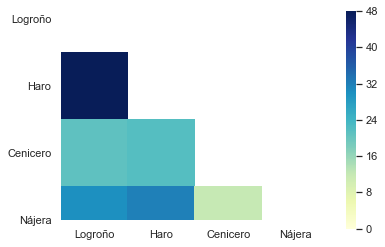

In [11]:
adj = nx.adjacency_matrix(G).todense()
mask = np.zeros_like(adj)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(adj, mask=mask, square=True, cmap="YlGnBu", xticklabels=G.nodes)
    ax.set_yticklabels(G.nodes, rotation=0)
    plt.show()

Ahora vamos a crear el Hamiltoniano que hemos definido más arriba, que como hemos dicho vendrá dado por la función $Q$. Como tenemos 4 ciudades, según las definiciones anteriores tenemos que tener $4^2 = 16$ qubits, cada uno correspondiente al par *(ciudad, tiempo)*. Como hemos dicho, la tarea de crear el Hamiltoniano que representa nuestro problema de optimización recibe el nombre de [Quadratic unconstrained binary optimization (QUBO)](https://en.wikipedia.org/wiki/Quadratic_unconstrained_binary_optimization). Empecemos con las interacciones entre ciudades, que dependian de las distacia:

In [23]:
# Begin with empty QUBO
N = G.number_of_nodes()    # Number of timesteps
Q = {((city_1, time_1),(city_2, time_2)): 0. for city_1 in G for city_2 in G for time_1 in range(N) for time_2 in range(N)}

# Put distances: Q[city_i, time][city_j, time+1] = d_ij
for city_1 in G:
    for city_2 in set(G) - {city_1}:
        for time in range(N):
            Q[((city_1, time), (city_2, (time+1)%N))] += G[city_1][city_2]['weight']

Ahora vamos a definir las penalizaciones. En este caso vamos a considerar que $\lambda_1 = \lambda_2 = 200$. Empecemos con la penalización sobre visitar una única vez cada ciudad:

In [24]:
penalty = 200

for time in range(N):
    for city_1 in G:
        Q[((city_1, time), (city_1, time))] -= penalty
        for city_2 in set(G)-{city_1}:
            Q[((city_1, time), (city_2, time))] += penalty

Ahora la penalización sobre las visitas de más de una ciudad en un mismo tiempo:

In [25]:
for city in G:
    for time_1 in range(N):
        Q[((city, time_1), (city, time_1))] -= penalty
        for time_2 in set(range(N)) - {time_1}:
            Q[((city, time_1), (city, time_2))] += penalty

Y ya tenemos listo nuestro QUBO! Tenemos la matriz $Q$ como Hamiltonian, y ahora vamos a usar el software de D-wave para hacer *quantum annealing*. El proceso es bastante similar al de `Qiskit`. Por ejemplo, también tenemos la posibilidad de trabajar con simuladores o con chips reales. Como no nos queremos entretener demasiado, vamos a centrarnos en el simulador. Pero si consiguís un token con vuestra cuenta de D-wave, también podeis correr el código en la máquina real. Cuando os hagaís la cuenta, os darán 1 minuto de tiempo de QPU, lo suficiente para implementar entre 400 y 4000 problemas (según ellos)!!!

In [9]:
sampler_simulator = SimulatedAnnealingSampler()

login_token = 'YOUR_TOKEN'
if login_token != 'YOUR_TOKEN':
    real_chip_sampler = EmbeddingComposite(DWaveSampler(endpoint='https://cloud.dwavesys.com/sapi',
                                                        token=login_token,
                                                        solver='DW_2000Q_2_1'))

Recordad que los qbits de D-wave se inicializaban de manera diferente a los de Qiskit. En este caso, el estado inicial del sistema es $|+\rangle^{\otimes n}=\frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1}|x\rangle$, el estado fundamental del Hamiltoniano $H_0=\sum_{i=1}^n X_i$. Pará resolver el problema utilizando el Quantum Annealing simplemente tenemos que hacer:

In [11]:
response = sampler_simulator.sample_qubo(Q)
response

SampleSet(rec.array([([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], -1495., 1),
           ([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], -1488., 1),
           ([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], -1488., 1),
           ([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], -1487., 1),
           ([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], -1488., 1),
           ([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], -1495., 1),
           ([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], -1487., 1),
           ([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], -1488., 1),
           ([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0], -1487., 1),
           ([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], -1487., 1)],
          dtype=[('sample', 'i1', (16,)), ('energy', '<f8'), ('num_occurrences', '<i8')]), [('Cenicero', 0), ('Cenicero', 1), ('Cenicero', 2), ('Cenicero', 3), ('Haro', 0), ('Haro', 1), ('Haro', 2), ('Haro', 3), ('Logroño', 0), ('Logroño', 1), ('Log

El output de la implementación son las diferentes configuraciones de spines, con su correspondiente energía. La primera configuración corresponde al estado de mínima energía, y por lo tanto a la ruta óptima. Vamos a hacer un poco de post processing con la siguiente función para averiguar a que ruta corresponde dicha configuración. 

In [12]:
def postprocess(response):
    # Take the first element of response.data(),
    # which is the sample with lowest energy 
    sample = next(response.data()).sample
    route = []
    for entry in sample:
        if sample[entry] > 0:
            route.append(entry)
    route.sort(key=lambda x: x[1])
    route = (x[0] for x in route)
    return list(route)

In [14]:
optimal_route = postprocess(response)
distance = sum([G[optimal_route[i]][optimal_route[(i+1)%N]]['weight'] for i in range(N)])
print('La ruta óptima es ' + ' -> '.join(optimal_route) + ', con una distancia total de {} km.'.format(distance))

La ruta óptima es Logroño -> Cenicero -> Haro -> Nájera, con una distancia total de 105 km.


**Ejercicio 1:** Si correis el código una serie de veces, vereis que la ruta es siempre la misma, pero empezando por una ciudad diferente. Esto tiene sentido ya que la distancia recorrida no depende del punto incial. No obstante, el cartero no empieza su ruta desde cualquier ciudad, si no en la cual esta la oficina de correos! Modificar la matríz $Q$ de manera que el viajante siempre empiece en una misma ciudad. Corred el código una serie de veces de manera que veais que la ciudad inicial siempre es la que habeís elegido.

**Ejercici 2:** Durante los durante días de invierno, la nieve bloquea el paso entre Haro y Cenicero, haciendo este camino infranqueable. Modificar la matriz $Q$ de manera que la ruta óptima no pase por este segmento de la ruta. Cual es ahora la ruta óptima?

In [33]:
# Solución 1
initial_city = 'Logroño'
favor = 2*penalty

Q[((initial_city, 0), (initial_city, 0))] -= favor
    
response = sampler_simulator.sample_qubo(Q)
 
optimal_route = postprocess(response)
distance = sum([G[optimal_route[i]][optimal_route[(i+1)%N]]['weight'] for i in range(N)])
print('La ruta óptima es ' + ' -> '.join(optimal_route) + ', con una distancia total de {} km.'.format(distance))

La ruta óptima es Logroño -> Cenicero -> Haro -> Nájera, con una distancia total de 105 km.


In [15]:
# Solución 2
city1 = 'Haro'
city2 = 'Cenicero'
for t in range(N):
    Q[((city1, t), (city2, (t+1)%N))] += penalty
    Q[((city2, t), (city1, (t+1)%N))] += penalty
    
    
response = sampler_simulator.sample_qubo(Q)

optimal_route = postprocess(response)
distance = sum([G[optimal_route[i]][optimal_route[(i+1)%N]]['weight'] for i in range(N)])
print('La ruta óptima es ' + ' -> '.join(optimal_route) + ', con una distancia total de {} km.'.format(distance))

La ruta óptima es Cenicero -> Logroño -> Haro -> Nájera, con una distancia total de 113 km.
